<a href="https://colab.research.google.com/github/MazonSzymon/EURPLN/blob/main/Szymon_Mazon_kurs_EURPLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Szymon Mazoń kurs EURPLN jako model ARMA

## Importowanie bibliotek i ustawienie wykresów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA

#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pobieranie danych oraz wstępna obróbka

In [2]:
df = pdr.get_data_stooq('eurpln.pl',dt.date(2020,1,1),dt.date.today()) #Pobieranie oryginalnych danych dotyczących kursu EURPLN poprzez notowania w serwisie stooq

In [3]:
df.sort_index(inplace= True) #Posortowanie danych według indeksu  

In [4]:
df.head() # Przegląd pierwyszch 5 rekordów danych

,Open,High,Low,Close
Date,,,,
2020-01-02,4.25670,4.25805,4.23877,4.23943
2020-01-03,4.23964,4.25851,4.23757,4.24404
2020-01-06,4.24375,4.25129,4.23097,4.23154
2020-01-07,4.23159,4.25007,4.23098,4.24477
2020-01-08,4.24541,4.24941,4.23132,4.23317


In [5]:
df.info() # Przegląd informacji o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 2020-01-02 to 2021-01-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    279 non-null    float64
 1   High    279 non-null    float64
 2   Low     279 non-null    float64
 3   Close   279 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


In [6]:
df.describe() # Przegląd podstawowych statystyk

,Open,High,Low,Close
count,279.000000,279.000000,279.000000,279.000000
mean,4.449072,4.465016,4.435589,4.449946
std,0.100821,0.103871,0.097726,0.100289
min,4.221890,4.233480,4.210710,4.222060
25%,4.403240,4.415635,4.391855,4.404120
50%,4.466650,4.481240,4.455470,4.466590
75%,4.532990,4.546725,4.514540,4.533045
max,4.631620,4.645470,4.607440,4.631570


In [7]:
eurpln = df.copy() # Stworzenie kopii na której odbywać się będzie analiza

In [8]:
eurpln.drop( columns= ['Open','High','Low'],inplace = True) # Do analizy wykorzystywana będzie cena zamknięcia kursu danego dnia , więc zbędne będą pozostałe kolumny

In [9]:
eurpln['Close'] = eurpln['Close'].round(5) # Zaokraglenie wartości zamknięcia 

## Kurs EURPLN jako szereg czasowy

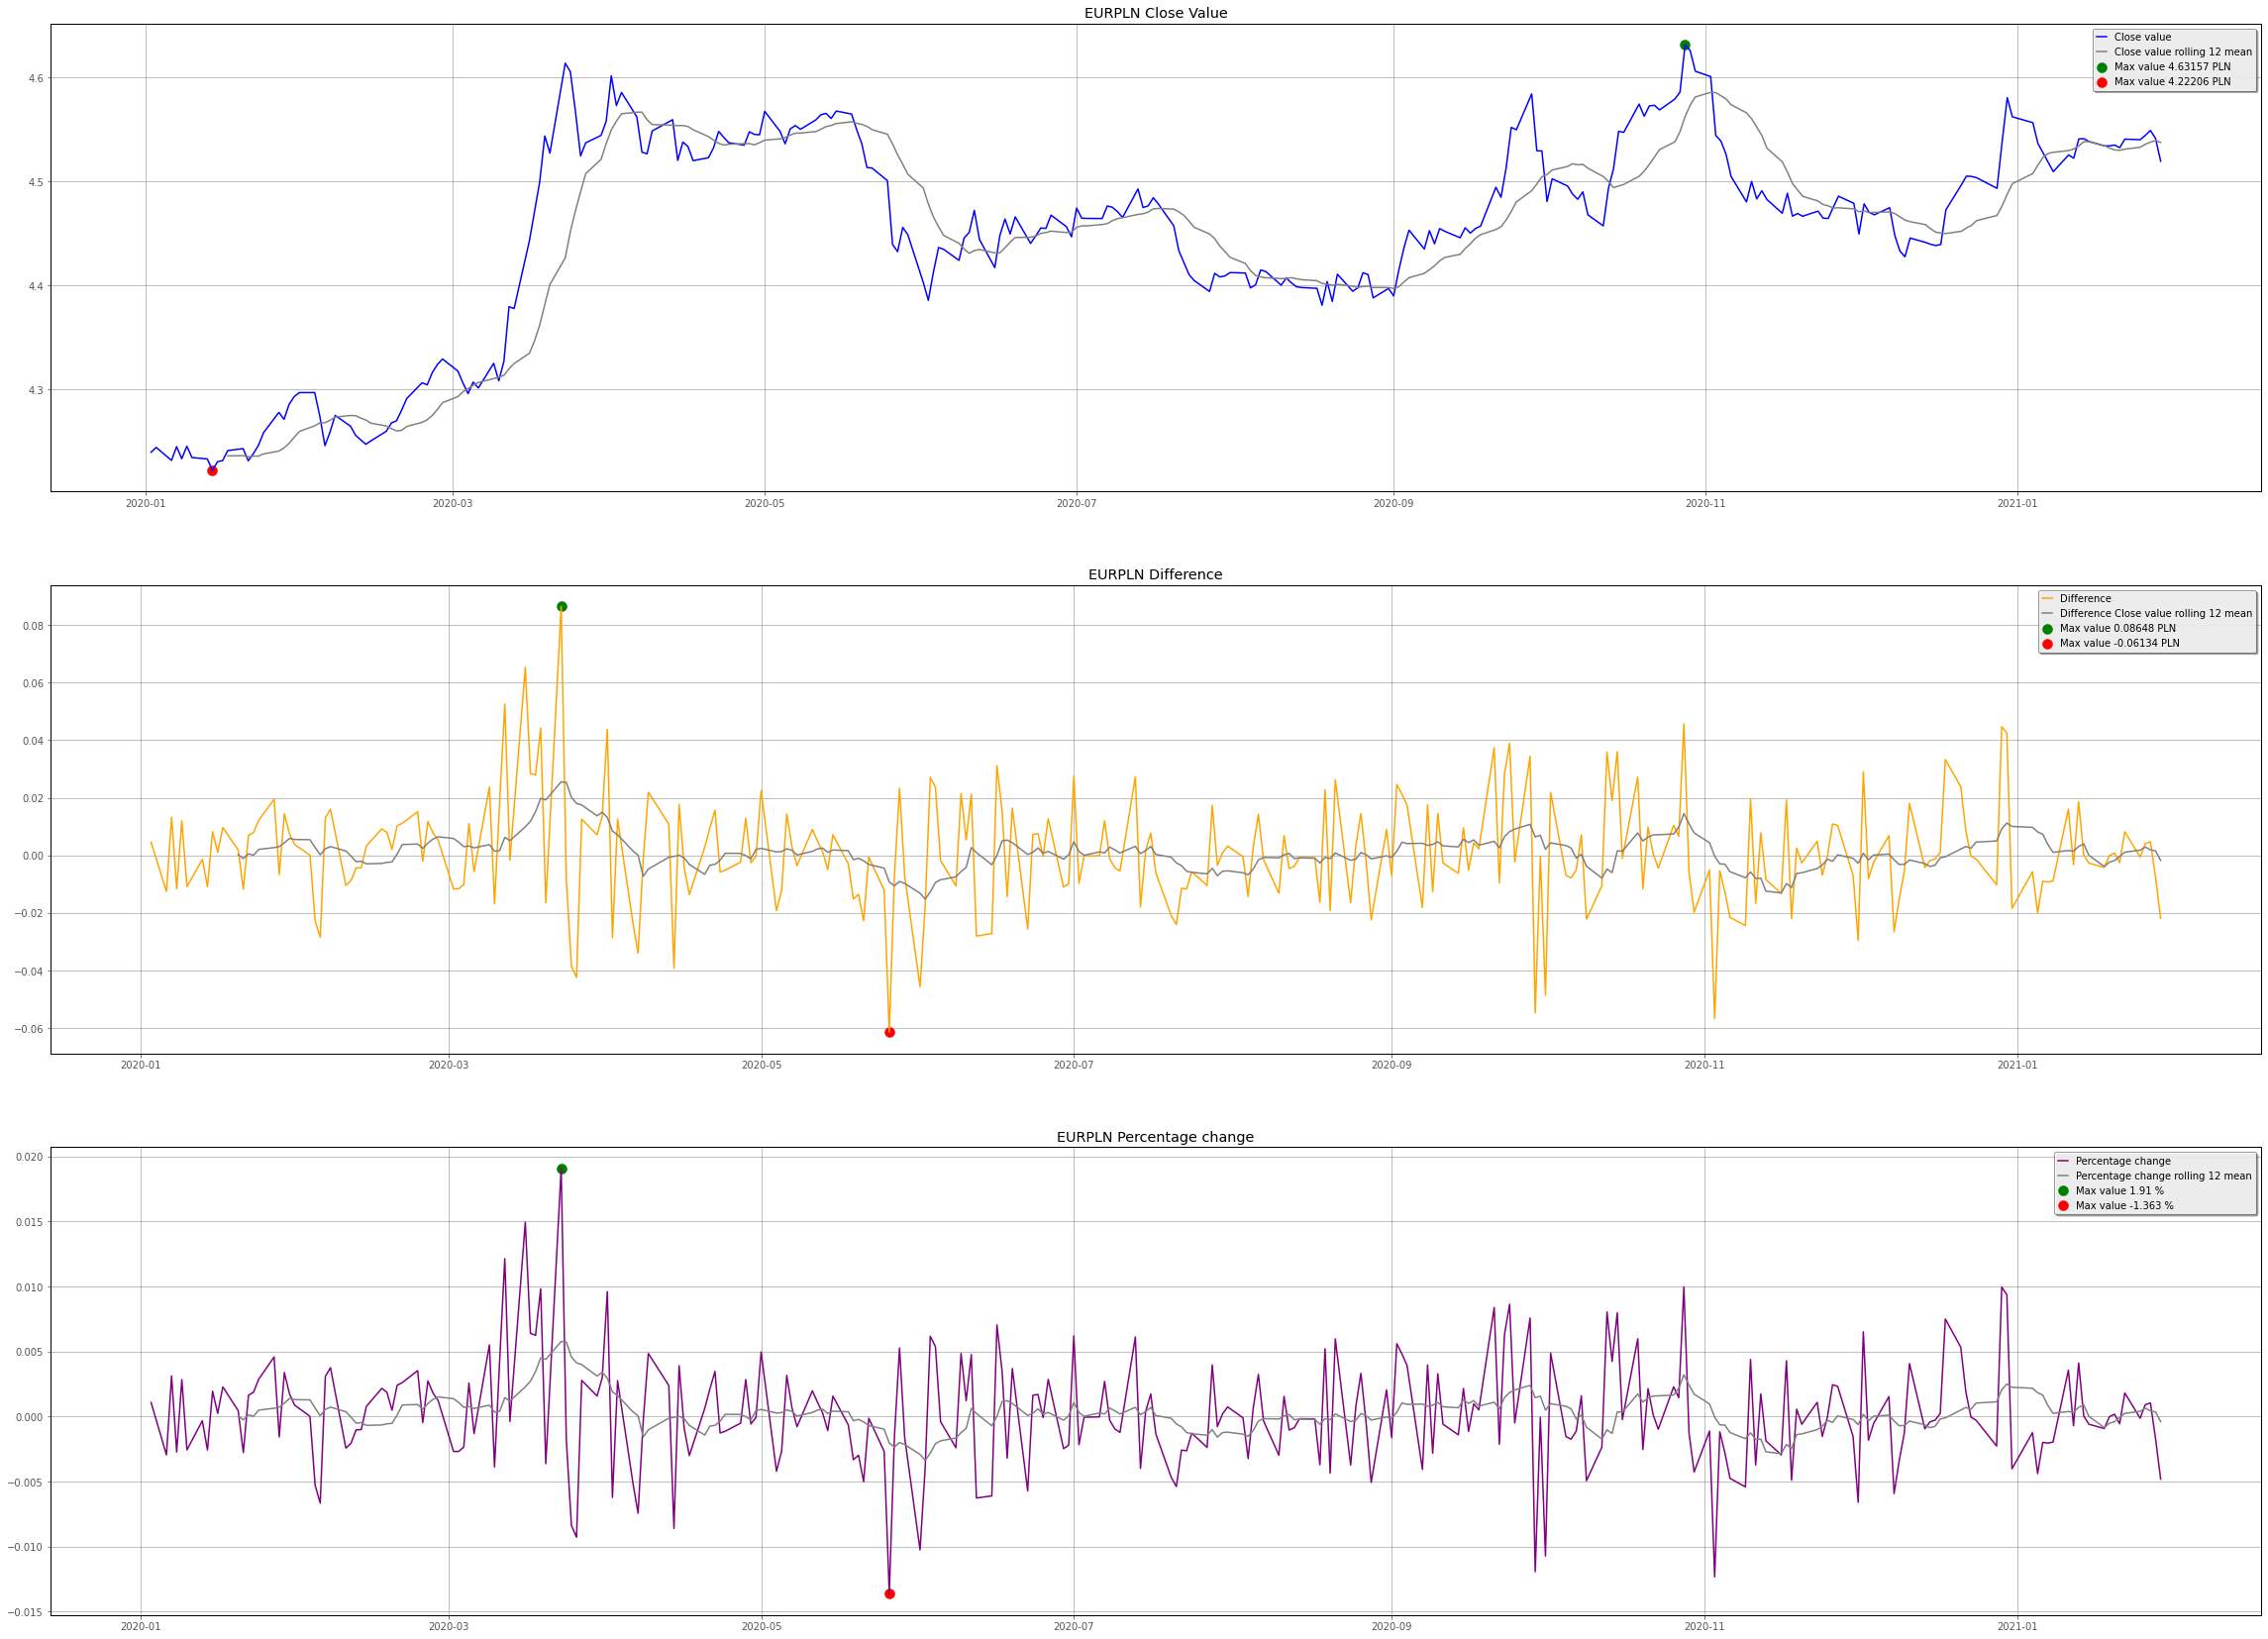

In [10]:
#Wyzualizacja kursu eurpln
plt.figure(figsize=(40,40))
#Notowania zamknięcia kursu EURPLN
plt.subplot(4,1,1)
plt.plot(eurpln['Close'], color = 'blue',label = 'Close value')
plt.plot(eurpln['Close'].rolling(12).mean(),color = 'gray',label = 'Close value rolling 12 mean')
plt.scatter(eurpln['Close'].idxmax(),eurpln['Close'].max(), color = 'green', s=100, label = 'Max value ' + str(eurpln['Close'].max()) + " PLN")
plt.scatter(eurpln['Close'].idxmin(), eurpln['Close'].min(), color = 'red', s=100, label = 'Max value ' + str(eurpln['Close'].min()) + " PLN")
plt.title('EURPLN Close Value')
plt.legend()
plt.grid()

# Różnice notowań zamknięcia kursu EURPLN
plt.subplot(4,1,2)
plt.plot(eurpln['Close'].diff(), color = 'orange',label = 'Difference')
plt.plot(eurpln['Close'].diff().rolling(12).mean(),color = 'gray',label = 'Difference Close value rolling 12 mean')
plt.scatter(eurpln['Close'].diff().idxmax(),eurpln['Close'].diff().max(), color = 'green', s=100, label = 'Max value ' + str(eurpln['Close'].diff().round(5).max()) + " PLN")
plt.scatter(eurpln['Close'].diff().idxmin(), eurpln['Close'].diff().min(), color = 'red', s=100, label = 'Max value ' + str(eurpln['Close'].diff().round(5).min()) + " PLN")
plt.title('EURPLN Difference')
plt.legend()
plt.grid()

# Zmiana procentowa notowań zamknięcia kursu EURPLN 
plt.subplot(4,1,3)
plt.plot(eurpln['Close'].pct_change(), color = 'purple',label = 'Percentage change')
plt.plot(eurpln['Close'].pct_change().rolling(12).mean(),color = 'gray',label = 'Percentage change rolling 12 mean')
plt.scatter(eurpln['Close'].pct_change().idxmax(),eurpln['Close'].pct_change().max(), color = 'green', s=100, label = 'Max value ' + str(eurpln['Close'].pct_change().round(5).max()*100) + " %")
plt.scatter(eurpln['Close'].pct_change().idxmin(), eurpln['Close'].pct_change().min(), color = 'red', s=100, label = 'Max value ' + str(eurpln['Close'].pct_change().round(5).min()*100) + " %")
plt.title('EURPLN Percentage change')
plt.legend()
plt.grid()


plt.show()


In [11]:
#Jak widać notowania zamknięcia kursu EURPLN są szeregiem czasowym, aby zastosować model ARMA będzie musieli doprowadzić go do szeregu stacjonarnego, aby to zrobić będziemy korzystac procentowej zmiany a nie samych notowań zamknięcia.
eurpln['Percentage_change'] = eurpln['Close'].pct_change().fillna(0).round(5)
eurpln.reset_index(inplace=True)
eurpln.head()


,Date,Close,Percentage_change
0,2020-01-02,4.23943,0.00000
1,2020-01-03,4.24404,0.00109
2,2020-01-06,4.23154,-0.00295
3,2020-01-07,4.24477,0.00313
4,2020-01-08,4.23317,-0.00273


## Ad Fuller test and ACF and PACF

In [12]:
#Aby sprawdzić czy szereg jest stacjonarny wykorzystamy test AD Fullera, natomiast ACF oraz PACF będą służyły Nam do wyboru hiperparametrów p,q modelu ARMA

In [13]:
from statsmodels.tsa.stattools import adfuller
#Funcja wykorzystująca adfullera pokazująca intersujące Nas wyniki
def ADF_test(data):
  X = data.fillna(0).values
  result = adfuller(X)
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Critical Values:')
  for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
  else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
#Funkcja wykorzystująca wykresy acf oraz pacf dzięki którym dobrane zostaną hiperparametry ARMA
def acf_and_pacf(data,n_lags):
  sgt.plot_acf(data.fillna(0), lags= n_lags, alpha = 0.05, zero = False)
  plt.grid()
  plt.title('Autocorrelation function',size = 20)
  plt.show()
  sgt.plot_pacf(data.fillna(0), lags = n_lags, alpha = 0.05, zero = False)
  plt.grid()
  plt.title('Parial Autocorrelation function', size = 20 )
  plt.show()

For 1
ADF Statistic: -16.726605380004557
p-value: 1.3942616908316124e-29
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
Reject Ho - Time Series is Stationary


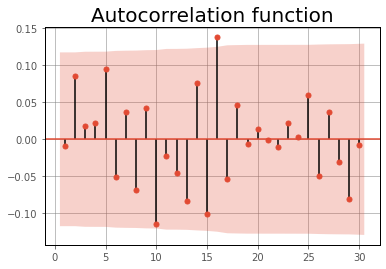

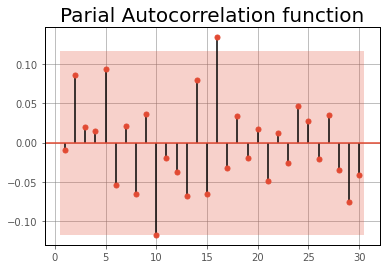

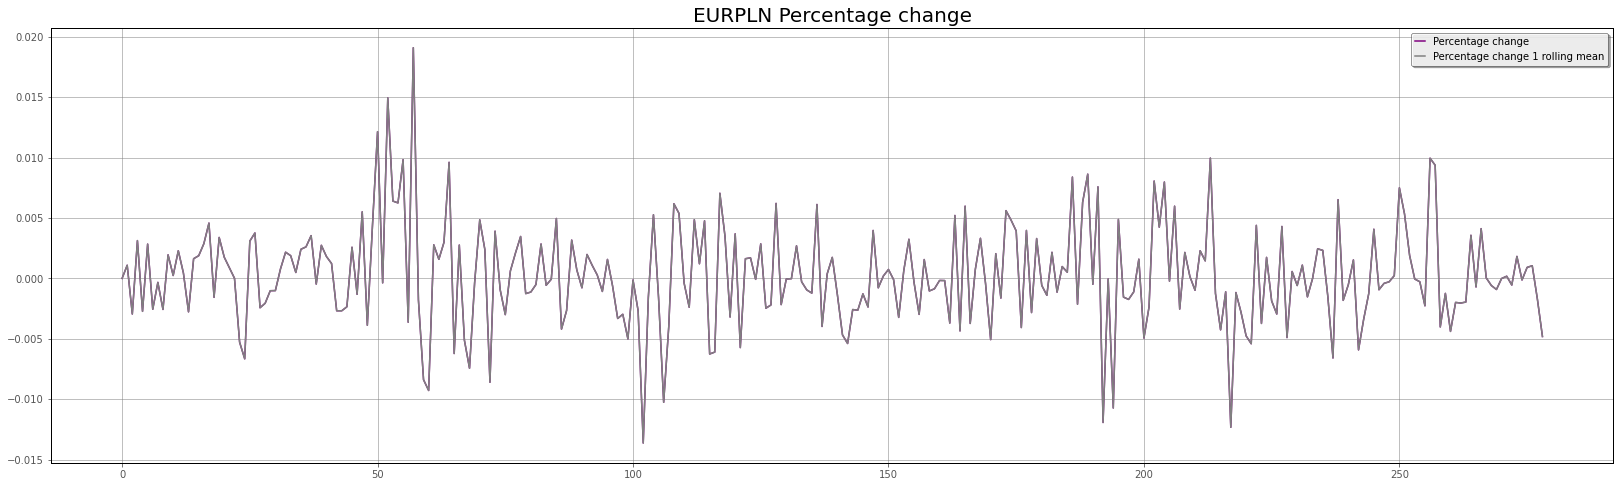

--------------------------------------------------



For 2
ADF Statistic: -3.8197105470639774
p-value: 0.002711967286893818
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


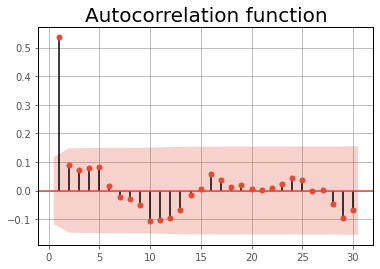

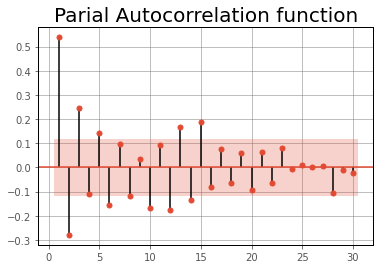

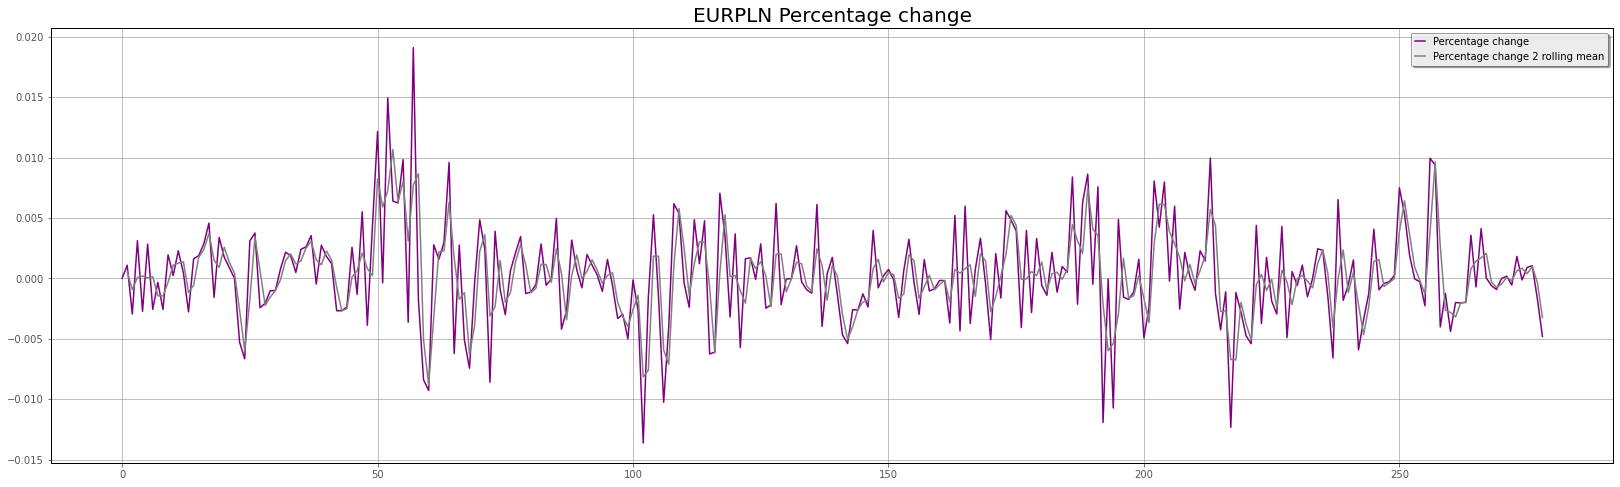

--------------------------------------------------



For 3
ADF Statistic: -3.4778989058216827
p-value: 0.008573173439437125
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


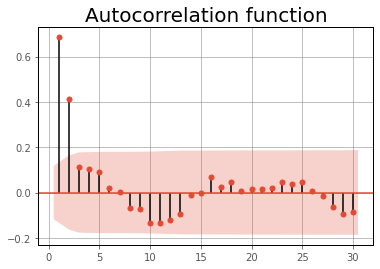

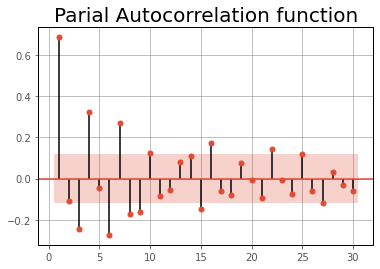

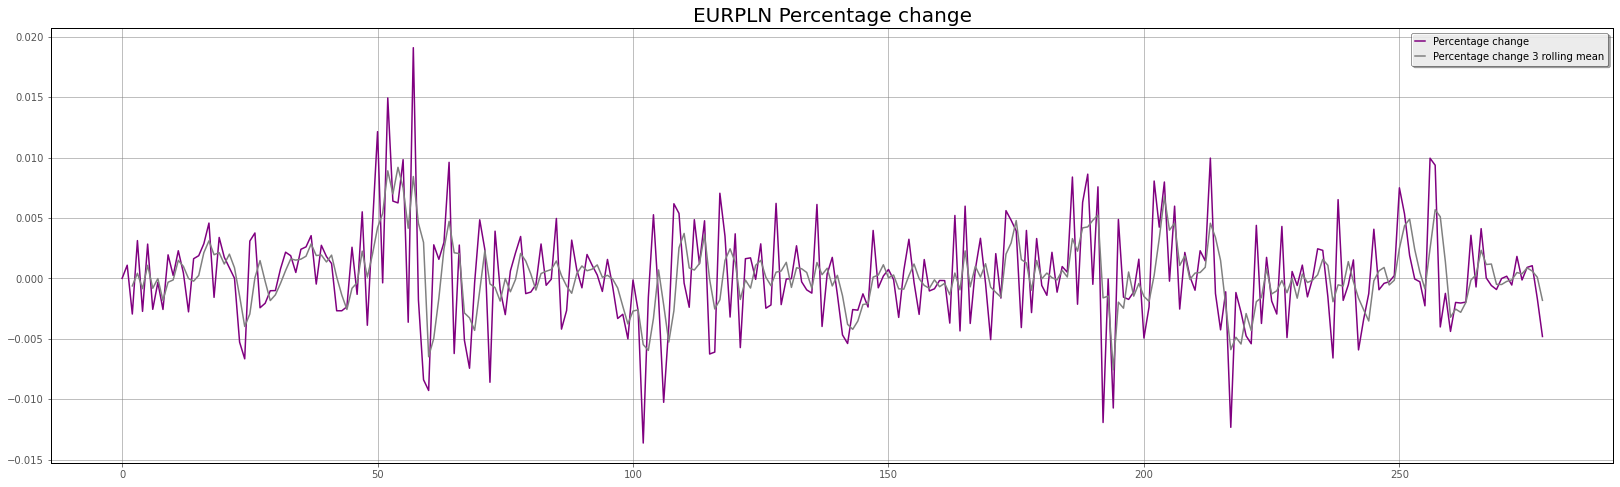

--------------------------------------------------



For 4
ADF Statistic: -3.881460581091214
p-value: 0.0021756036269323735
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


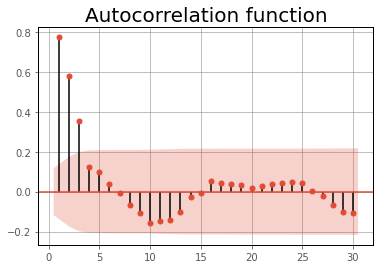

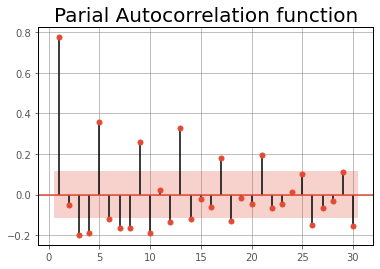

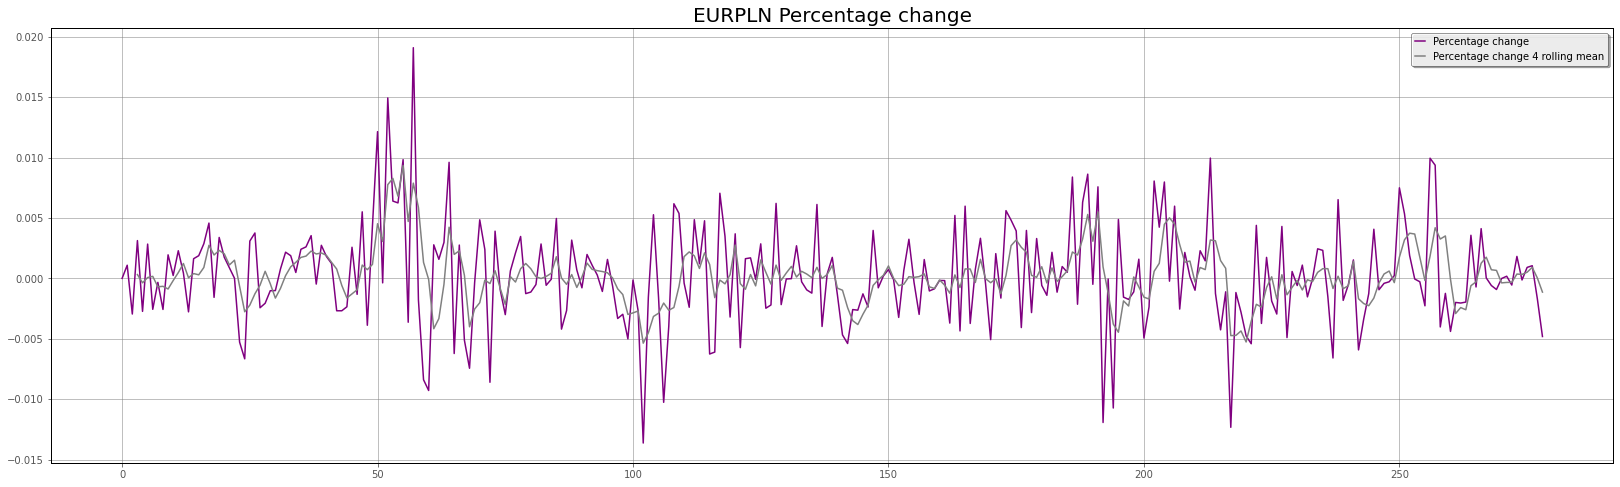

--------------------------------------------------



For 5
ADF Statistic: -3.4060172032378757
p-value: 0.010755447915424947
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


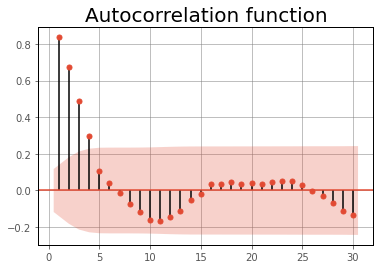

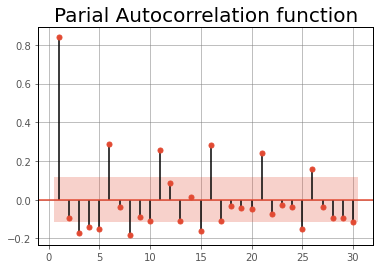

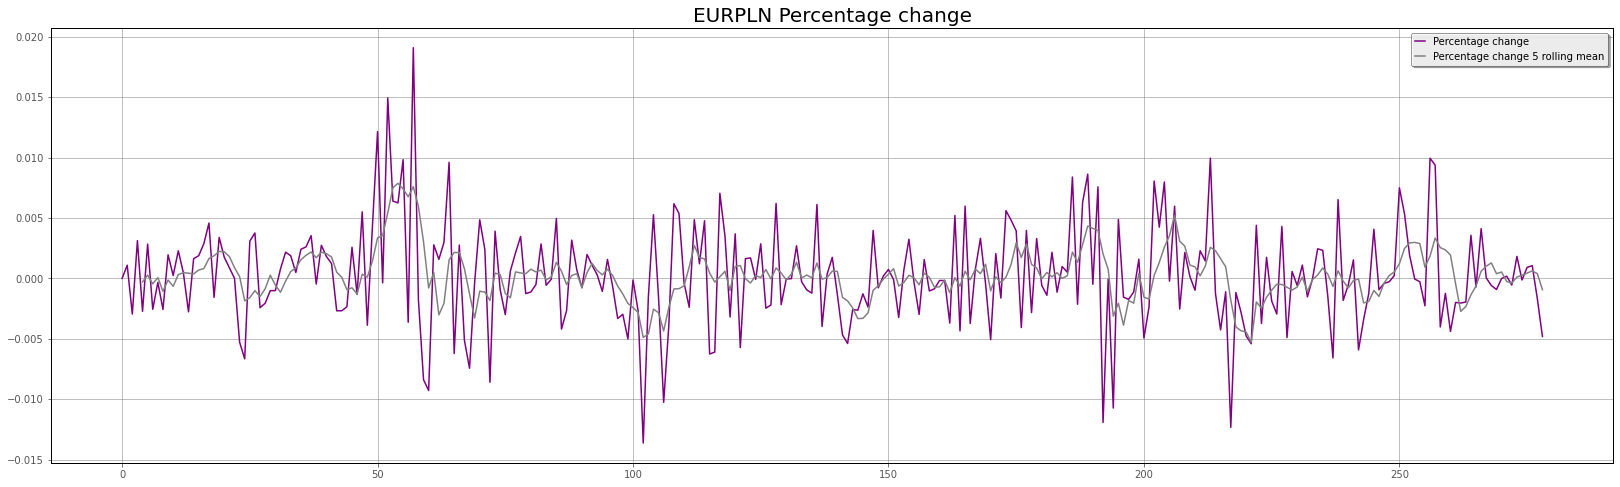

--------------------------------------------------



For 6
ADF Statistic: -3.3078839788503496
p-value: 0.014529717589468935
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
Reject Ho - Time Series is Stationary


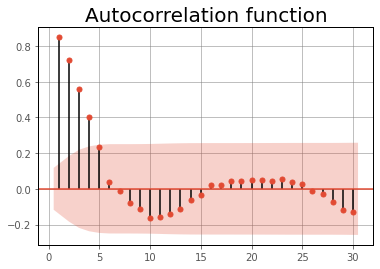

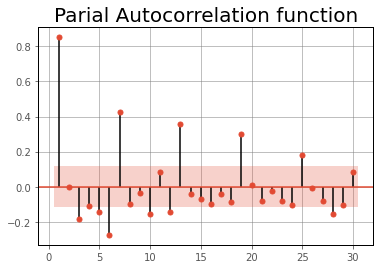

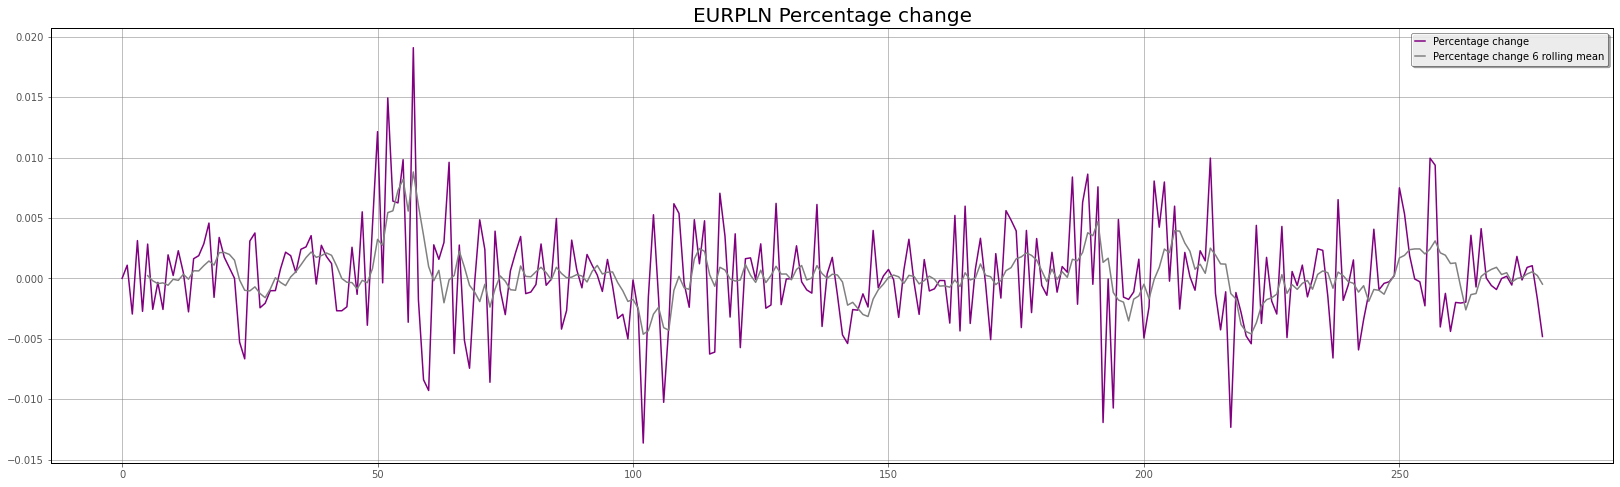

--------------------------------------------------



For 7
ADF Statistic: -3.4074197265554873
p-value: 0.010708519247169347
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


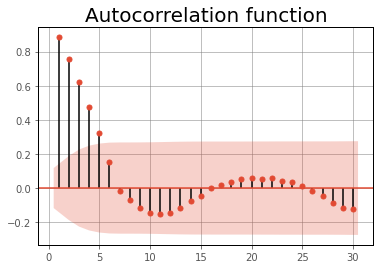

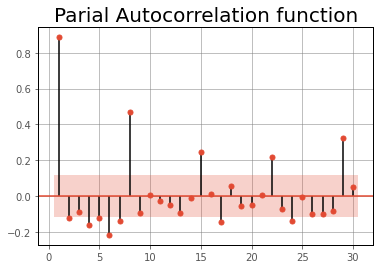

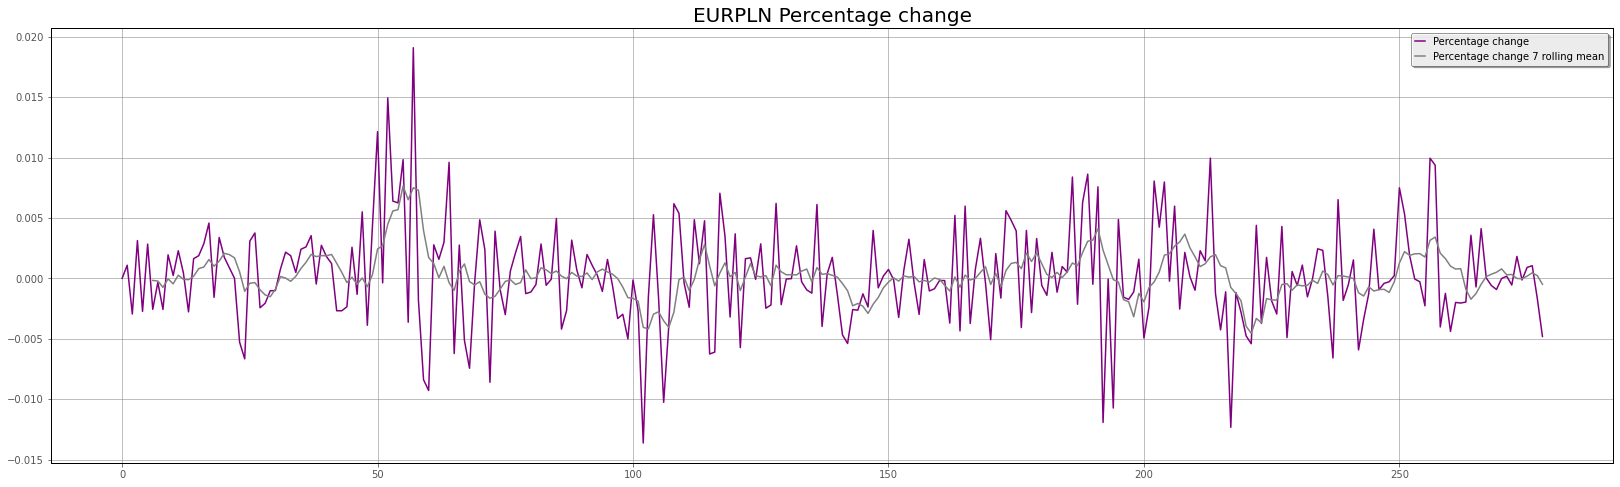

--------------------------------------------------



For 8
ADF Statistic: -2.876671640238387
p-value: 0.048128798478105264
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


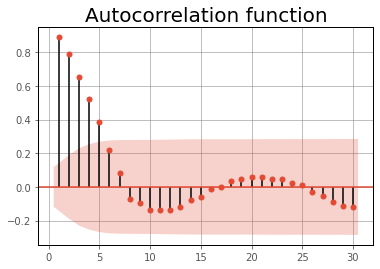

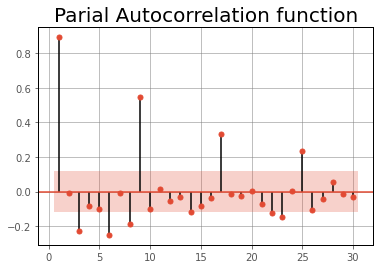

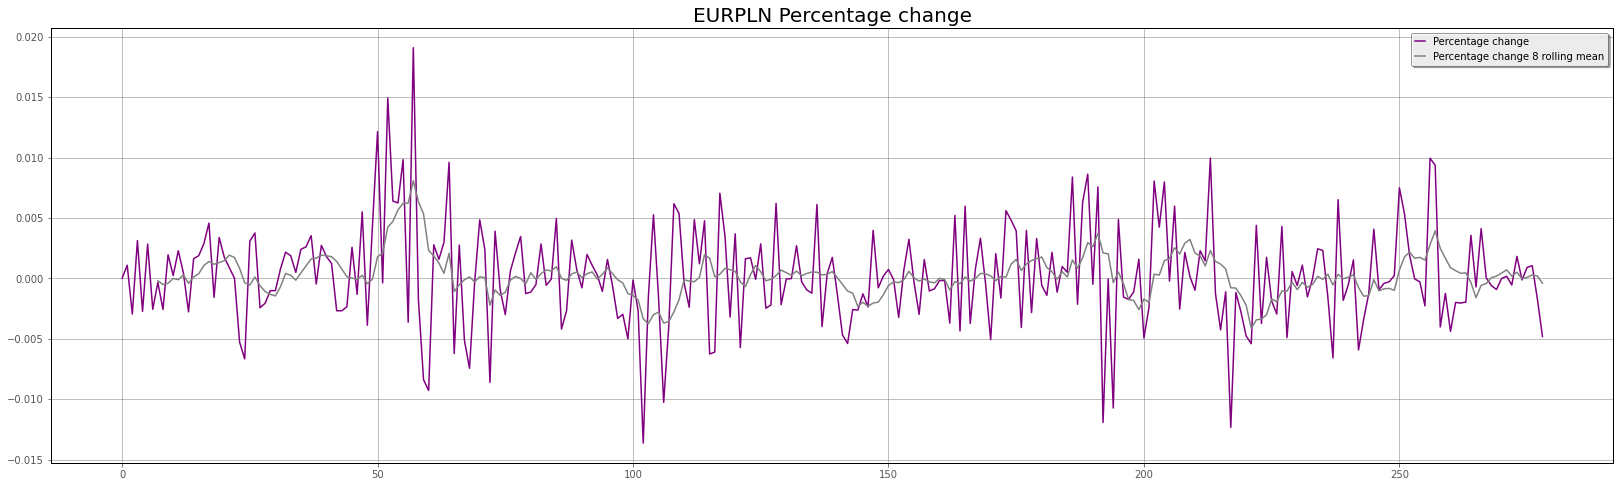

--------------------------------------------------





In [14]:
# Sprawdźy dla kolejnych rolowań po którym szereg stanie się stacjonarny i będziemy mogli dobrać odpowiednie parametry p oraz q
for i in range(1,9):
  print(f'For {i}')
  x = eurpln['Percentage_change'].rolling(i).mean()
  ADF_test(x)
  acf_and_pacf(x,30)
  #Visual
  plt.figure(figsize=(28,8))
  plt.plot(eurpln['Percentage_change'], color = 'purple', label = 'Percentage change')
  plt.plot(x, color = 'gray', label = f'Percentage change {i} rolling mean')
  plt.grid()
  plt.legend()
  plt.title('EURPLN Percentage change', size = 20)
  plt.show()
  print("-"*50)
  print(2*"\n")

## Model ARMA(9,5)

In [15]:
#Po analizie decyduję się na zbudowanie modelu ARMA na podstawie przesunięcia 8 dniowej średniej kroczącej, o parametrzy p = 9 oraz q =5
x = eurpln['Percentage_change'].rolling(8).mean()
model_arma = ARMA(x.iloc[7:], order = (9,5))
results_arma = model_arma.fit()
results_arma.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Percentage_change   No. Observations:                  272
Model:                     ARMA(9, 5)   Log Likelihood                1643.755
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sun, 31 Jan 2021   AIC                          -3255.510
Time:                        12:15:10   BIC                          -3197.817
Sample:                             0   HQIC                         -3232.348
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0002      0.000      0.944      0.346      -0.000       0.001
ar.L1.Percentage_change     0.0982      0.074      1.323      0.187      -0.047       0.244
ar.L2.Percentage_change     0.8236      0.066     12.386      0.000       0.693       0.954
ar.L3.Percentage_change     0.0024      0.076      0.032      0.975      -0.147       0.152
ar.L4.Percentage_change    -0.6942      0.073     -9.457      0.000      -0.838      -0.550
ar.L5.Percentage_change     0.1512      0.088      1.728      0.085      -0.020       0.323
ar.L6.Percentage_change     0.3731      0.074      5.037      0.000       0.228       0.518
ar.L7.Percentage_change    -0.0092      0.076     -0.122      0.903      -0.158       0.139
ar.L8.Percentage_change    -0.3351      0.061     -5.478      0.000      -0.455      -0.215
ar.L9.Percentage_change     0.0882      0.068      1.305      0.193      -0.044       0.221
ma.L1.Percentage_change     0.9056      0.053     17.133      0.000       0.802       1.009
ma.L2.Percentage_change    -0.0186      0.027     -0.683      0.495      -0.072       0.035
ma.L3.Percentage_change    -0.0050      0.029     -0.173      0.863      -0.062       0.052
ma.L4.Percentage_change     1.0037      0.045     22.458      0.000       0.916       1.091
ma.L5.Percentage_change     0.8920      0.054     16.554      0.000       0.786       0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9933           -0.4159j            1.0768           -0.4369
AR.2           -0.9933           +0.4159j            1.0768            0.4369
AR.3           -0.7098           -0.9185j            1.1608           -0.3547
AR.4           -0.7098           +0.9185j            1.1608            0.3547
AR.5            0.7101           -0.9704j            1.2025           -0.1495
AR.6            0.7101           +0.9704j            1.2025            0.1495
AR.7            1.1476           -0.3476j            1.1990           -0.0468
AR.8            1.1476           +0.3476j            1.1990            0.0468
AR.9            3.4919           -0.0000j            3.4919           -0.0000
MA.1            0.7091           -0.7060j            1.0006           -0.1247
MA.2            0.7091           +0.7060j            1.0006            0.1247
MA.3           -0.7168           -0.7037j            1.0045           -0.3765
MA.4           -0.7168           +0.7037j            1.0045            0.3765
MA.5           -1.1097           -0.0000j            1.1097           -0.5000
-----------------------------------------------------------------------------
"""

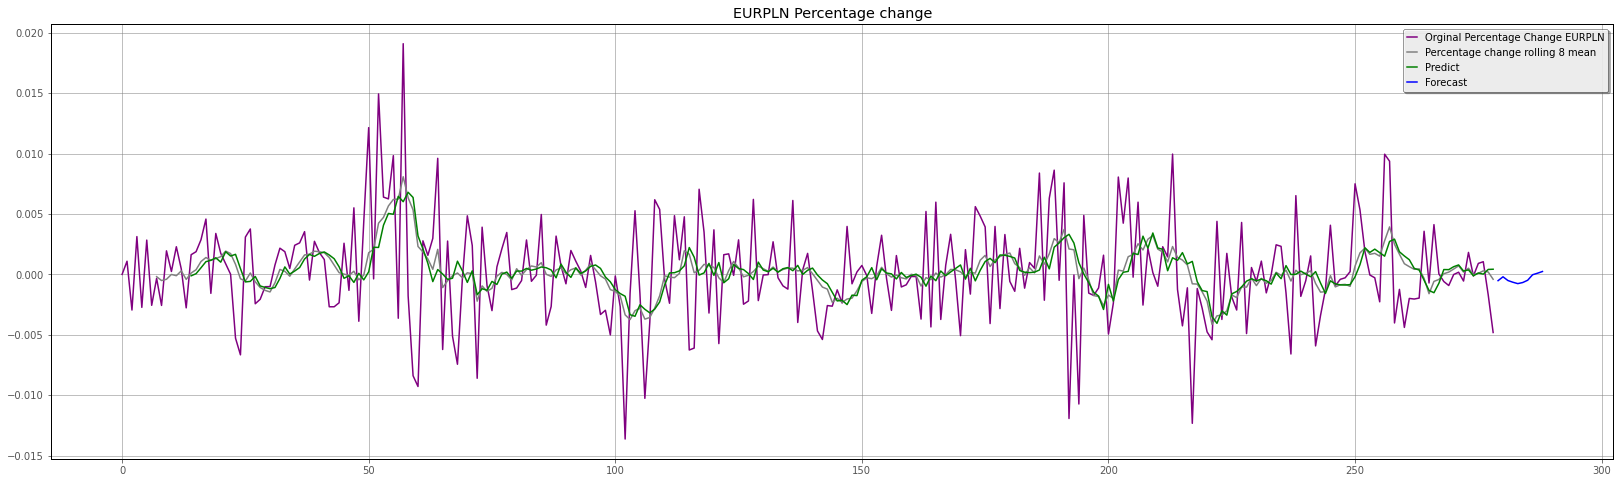

In [16]:
#Prezentacja modelu oraz przewidzenie kolejnych 10 dni.
plt.figure(figsize=(28,8))
plt.plot(eurpln['Percentage_change'], color = 'purple', label = 'Orginal Percentage Change EURPLN')
plt.plot(x, color = 'gray', label = 'Percentage change rolling 8 mean')
plt.plot(results_arma.predict(), color = 'green', label = 'Predict')
plt.plot(eurpln.index[-10:]+10,results_arma.forecast(10, alpha = 0.05)[0], color = 'blue', label = 'Forecast')
plt.grid()
plt.legend()
plt.title('EURPLN Percentage change')
plt.show()

In [17]:
#Sprawdzenie modelu
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('MSE= ' +  str(mean_absolute_error(x.iloc[14:],results_arma.predict()).round(5)))
print('R2=' + str(r2_score(x.iloc[14:],results_arma.predict()).round(5)))

MSE= 0.00043
R2=0.88177
